## Descriptive analysis notebook
### National Health and Nutrition Examination Survey (NHANES) 2015-2016

This notebook showcases some descriptive analyses using different python libraries on the NHANES 2015-2016 data. Check the [NHANES codebook](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#Codebook) for a description of all the dataset variables.

In [ ]:
# List files in the folder directory of my Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd My\ Drive/Colab/Portfolio/NHANES\ 2015-2016
%ls

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

da = pd.read_csv("nhanes_2015_2016.csv")

# Printing a list of the dataframe columns
print(da.columns)
da.shape

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


(5735, 28)

We can get some insights of the dataset on the quantitative variables age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), weight ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) and body mass index ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) using `describe()`.

In [3]:
da[["RIDAGEYR", "BMXWT", "BMXHT", "BMXBMI"]].describe()

,RIDAGEYR,BMXWT,BMXHT,BMXBMI
count,5735.000000,5666.000000,5673.000000,5662.000000
mean,48.052310,81.342676,166.142834,29.382197
std,18.431011,21.764409,10.079264,7.095921
min,18.000000,32.400000,129.700000,14.500000
25%,32.000000,65.900000,158.700000,24.300000
50%,48.000000,78.200000,166.000000,28.300000
75%,63.000000,92.700000,173.500000,33.000000
max,80.000000,198.900000,202.700000,67.300000


We can see the age mean of this dataset is 48.1 years, with a standard deviation of $\pm$ 18.4 years, with a minimum of 18 years and a maximum of 80 years. We can also see the first and third quartile values for age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)).

The previously stated parameters can be seen for weight ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) and body mass index ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) as well.

We can also display these descriptive parameters for the said variables with a boxplot, by using the seaborn library.

[Text(0.5, 1.0, 'Boxplot of RIDAGEYR, BMXWT, BMXHT, BMXBMI')]

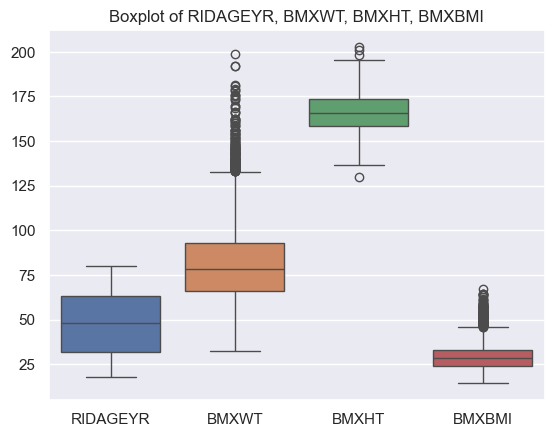

In [4]:
sns.set_theme()
sns.boxplot(data=da.loc[:, ["RIDAGEYR", "BMXWT", "BMXHT", "BMXBMI"]]).set(title='Boxplot of RIDAGEYR, BMXWT, BMXHT, BMXBMI')

We can create a boxplot using the plotly library, which can display additional information when hovering over it. Note how by stating `boxmean = "sd"` we get the mean and also the standard deviation for that specific variable.

In [5]:
# Extracting list of objects
da_RIDAGEYR = da["RIDAGEYR"].values.tolist()
da_BMXWT = da["BMXWT"].values.tolist()
da_BMXHT = da["BMXHT"].values.tolist()
da_BMXBMI = da["BMXBMI"].values.tolist()

# Creating a boxplot in Matplotlib for the variables RIDAGEYR, BMXWT, BMXHT, BMXBMI
dataset_box = go.Figure()

dataset_box.add_trace(go.Box(
    y=da_RIDAGEYR,
    name="RIDAGEYR",
    marker_color="blue",
    boxmean="sd"
))

dataset_box.add_trace(go.Box(
    y=da_BMXWT,
    name="BMXWT",
    marker_color="orange",
    boxmean=True
))

dataset_box.add_trace(go.Box(
    y=da_BMXHT,
    name="BMXHT",
    marker_color="green",
    boxmean=True
))

dataset_box.add_trace(go.Box(
    y=da_BMXBMI,
    name="BMXBMI",
    marker_color="red",
    boxmean=True
))

dataset_box.update_layout(title='Distribution of RIDAGEYR, BMXWT, BMXHT, BMXBMI',
                             xaxis={'title':'Group'},
                             yaxis={'title':'Count'})

dataset_box.show()

We can create a histogram of the distribution of weight ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)) with the seaborn library, for the overall dataset and separated by gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)).

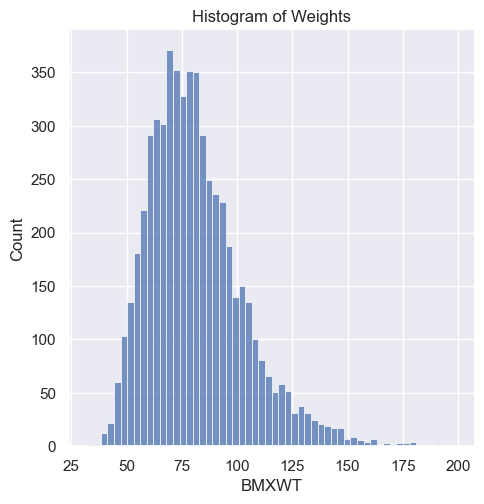

In [6]:
sns.displot(da["BMXWT"].dropna()).set(title='Histogram of Weights')

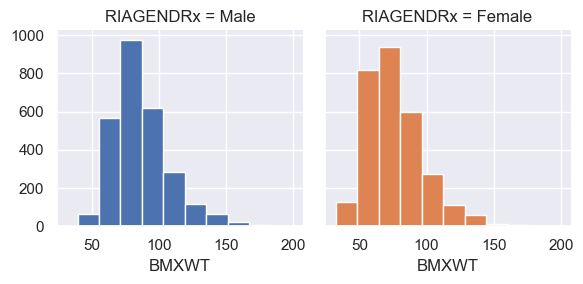

[Text(0.5, 1.0, 'Boxplot of Weights by gender')]

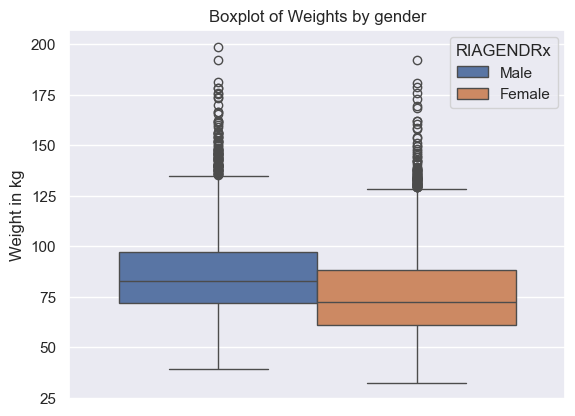

In [7]:
# Relabeling RIAGENDR
da["RIAGENDRx"] = da["RIAGENDR"].replace({1: "Male", 2: "Female"})

dataset_plot = sns.FacetGrid(da, col="RIAGENDRx", hue="RIAGENDRx")
dataset_plot = dataset_plot.map(plt.hist, "BMXWT")
plt.show()

dataset_box = sns.boxplot(da, x="RIAGENDRx", y="BMXWT")
dataset_box.set_ylabel("Weight in kg")
dataset_box.set(title="Boxplot of Weights by gender")

We can construct frequency tables for educational level ([DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)) for men only, then for women only.

In [8]:
# Relabeling DMDEDUC2 and RIAGENDR
da["DMDEDUC2x"] = da["DMDEDUC2"].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some College/AA", 7: "Refused", 9: "Don't know"})
da["RIAGENDRx"] = da["RIAGENDR"].replace({1: "Male", 2: "Female"})

# Deselecting the "Don't know" rows from the dataframe
not_dk = da.loc[(da["DMDEDUC2x"] != "Don't know")]

print("Frequency table by education level, Adults 20+ of males")
print(not_dk[not_dk["RIAGENDRx"] == "Male"]["DMDEDUC2x"].value_counts(normalize=True))
print()

print("Frequency table by education level, Adults 20+ of females")
print(not_dk[not_dk["RIAGENDRx"] == "Female"]["DMDEDUC2x"].value_counts(normalize=True))

Frequency table by education level, Adults 20+ of males
DMDEDUC2x
Some College/AA    0.271548
5.0                0.247521
HS/GED             0.229977
9-11               0.134249
<9                 0.116705
Name: proportion, dtype: float64

Frequency table by education level, Adults 20+ of females
DMDEDUC2x
Some College/AA    0.319059
5.0                0.251667
HS/GED             0.204633
<9                 0.122499
9-11               0.102141
Name: proportion, dtype: float64


We can also construct tables as previously described, but this time we limit the ages between 20 to 40 years.

In [9]:
# Selecting rows with ages >=20 and <=40
age_crit = not_dk.loc[(da["RIDAGEYR"] >=20) & (da["RIDAGEYR"] <=40)]

print("Frequency table by education level, Adults 20-40 of males")
print(age_crit[age_crit["RIAGENDRx"] == "Male"]["DMDEDUC2x"].value_counts(normalize=True))
print()

print("Frequency table by education level, Adults 20-40 of females")
print(age_crit[age_crit["RIAGENDRx"] == "Female"]["DMDEDUC2x"].value_counts(normalize=True))

Frequency table by education level, Adults 20-40 of males
DMDEDUC2x
Some College/AA    0.301075
5.0                0.254839
HS/GED             0.238710
9-11               0.133333
<9                 0.072043
Name: proportion, dtype: float64

Frequency table by education level, Adults 20-40 of females
DMDEDUC2x
Some College/AA    0.356378
5.0                0.296981
HS/GED             0.191821
9-11               0.083739
<9                 0.071081
Name: proportion, dtype: float64


We can construct a frequency table of household sizes for people within each race/hispanic origin attainment category ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)).

In [10]:
da["RIDRETH1x"] = da["RIDRETH1"].replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 4: "Non-Hispanic Black", 5: "Other Race"})
da.groupby(["RIDRETH1x"])["DMDHHSIZ"].value_counts(normalize=True).unstack()

DMDHHSIZ,1,2,3,4,5,6,7
RIDRETH1x,,,,,,,
Mexican American,0.054028,0.191552,0.177800,0.181729,0.151277,0.120825,0.122790
Non-Hispanic Black,0.171149,0.248574,0.181744,0.147514,0.116544,0.061940,0.072535
Non-Hispanic White,0.194127,0.361066,0.159869,0.133225,0.091898,0.037520,0.022295
Other Hispanic,0.090667,0.214667,0.188000,0.208000,0.153333,0.085333,0.060000
Other Race,0.088790,0.245283,0.219756,0.187569,0.130966,0.052164,0.075472


Non-Hispanic whites have the highest proportion for a household size of 2 from all other races/hispanic origin categories. Note how the proportions for Mexican-Americans and Other hispanic categories don't vary as much between household sizes 2 to 4 when compared to other races/hispanic origin categories.

We can construct a stratified table by a combination of race/hispanic origin ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), to see any difference in the means of age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), weight ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)) and first systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).

In [11]:
da.groupby(["RIDRETH1x", "RIAGENDRx"])[["RIDAGEYR", "BMXWT", "BPXSY1"]].mean().unstack()

RIDAGEYR                 BMXWT                 BPXSY1  \
RIAGENDRx              Female       Male     Female       Male      Female   
RIDRETH1x                                                                    
Mexican American    46.173112  46.395789  77.350000  86.079095  121.905697   
Non-Hispanic Black  46.287250  47.144097  83.896734  89.095760  125.786311   
Non-Hispanic White  50.898901  52.404736  77.221397  90.093333  123.122685   
Other Hispanic      48.971963  48.298137  74.429176  85.954206  125.071605   
Other Race          44.479730  43.586433  65.314286  77.256291  119.826303   

                                
RIAGENDRx                 Male  
RIDRETH1x                       
Mexican American    126.926407  
Non-Hispanic Black  131.007463  
Non-Hispanic White  126.242152  
Other Hispanic      127.132686  
Other Race          123.488152

Across race/hispanic origin categories, the highest mean of age corresponds to Non-Hispanic whites; the highest mean of weight corresponds to both Non-Hispanic whites and Non-Hispanic blacks; the highest mean of first systolic blood pressure measurement corresponds to Non-Hispanic blacks.

We can see a noticeable difference between males and females for the means of the weight variable (Non-Hispanic whites present the highest difference with 13.1 kg) and first systolic blood pressure measurements (Non-Hispanic blacks present the highest difference with 5.2). No particularly noticeable difference is seen for the age variable across race/hispanic origin categories.

We can construct scatterplots to compare the distribution of height and weight by race/hispanic origin categories (columns) and gender (rows).

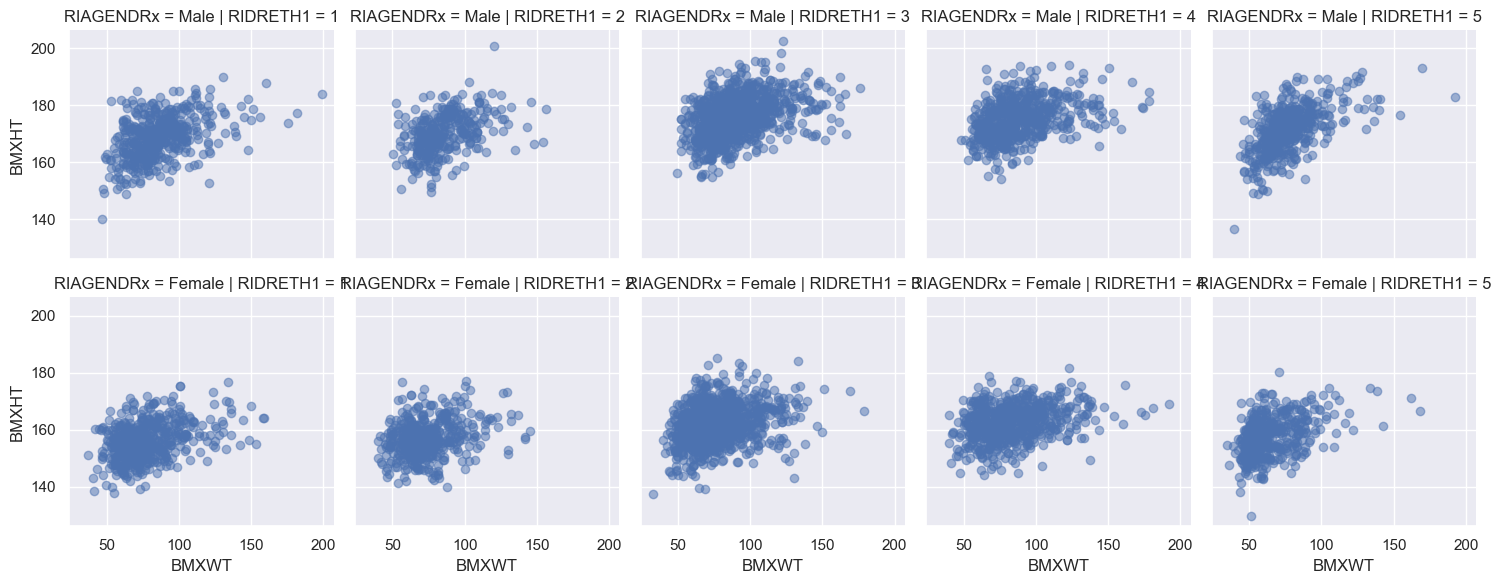

In [12]:
sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BMXWT", "BMXHT", alpha=0.5).add_legend()

There's a difference on weight and height distributions between men and women across race/hispanic origin categories, with no noticeable differences between each race/hispanic origin category. We can observe how Non-Hispanic whites and Non-Hispanic blacks have a higher weight variance than other race/hispanic origin categories.

We can create violin plots to compare the distribution of ages within marital status groups and gender.

<Axes: xlabel='DMDMARTLx', ylabel='RIDAGEYR'>

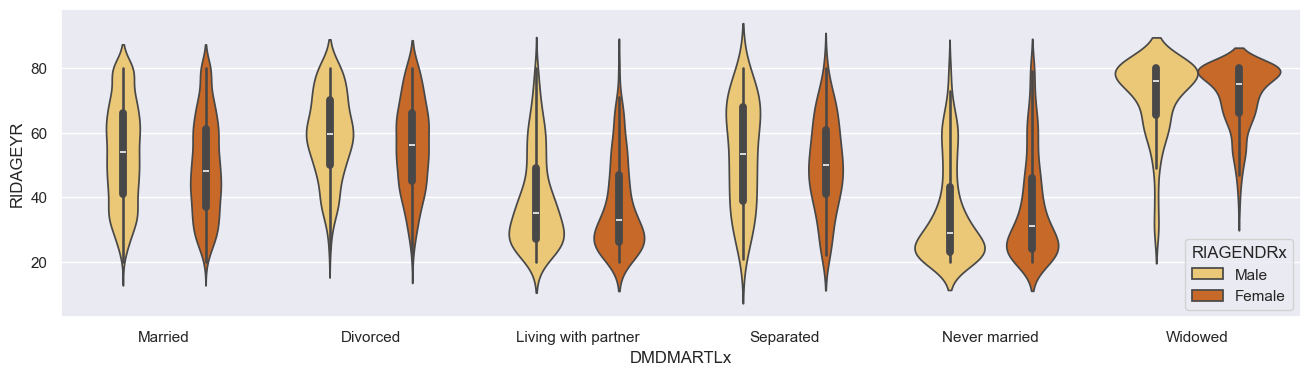

In [22]:
# Relabeling DMDMARTL
da["DMDMARTLx"] = da["DMDMARTL"].replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                          6: "Living with partner", 77: "Refused", 99: "Don't know"})

# Deselects the "Don't know" and "Refused" rows from the dataframe
criteria = da.loc[(da["DMDEDUC2x"] != "Don't know" ) & (da["DMDMARTLx"] != "Refused")]

plt.figure(figsize=(16, 4))
sns.violinplot(criteria, x="DMDMARTLx", y="RIDAGEYR", hue="RIAGENDRx", palette="YlOrBr")

Never married status, followed by living with partner status, have the lowest age mean. The widowed status group has the highest age mean.

We can create violin plots to compare the distribution of first systolic blood pressure measurements within a series of 10-year age bands, stratified by gender.

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

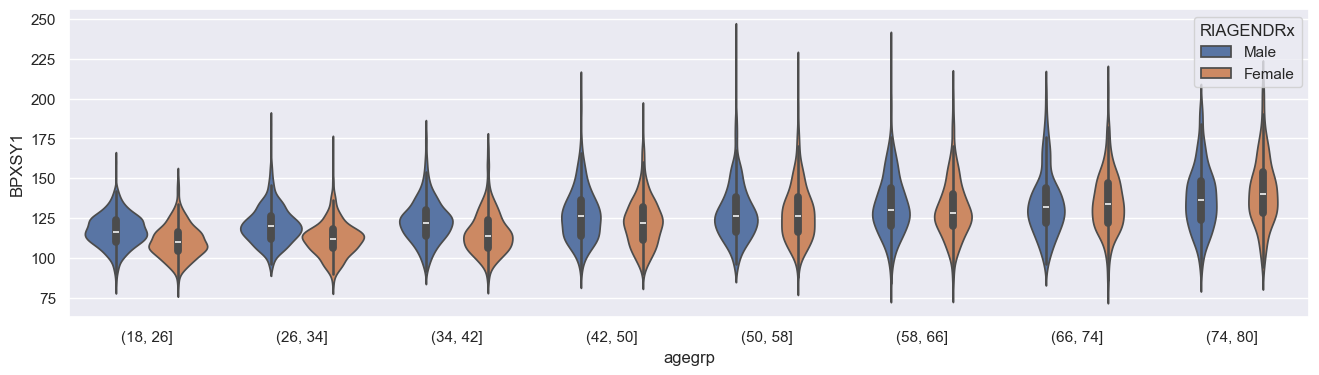

In [17]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 26, 34, 42, 50, 58, 66, 74, 80])
plt.figure(figsize=(16, 4))
sns.violinplot(da, x="agegrp", y="BPXSY1", hue="RIAGENDRx")

Across the 10-year age bands there's a upward trend on the mean first systolic blood pressure measurements as age increases, with higher variance as well.

Men have higher average first systolic blood pressure measurements than women on the lower spectrum of age, but the difference narrows as age increases, with a reversal this proportion on the last age band.